# Step 3: Handling missing values

## Preprocessing Pipeline Overview

This preprocessing pipeline outlines the steps necessary to prepare the Telco Customer Churn dataset for our modeling. Each step is designed to address specific aspects of data quality, transformation, and feature creation. We will cover each step in a separate jupyter notebook file.

**Step 1: Data Loading**: Loading the datasets into the workspace, ensuring all necessary files are correctly imported for analysis. This includes the Kaggle dataset and the IBM datasets.

**Step 2: Dataset Integration**: Combining relevant datasets into a single, unified dataset that will serve as the foundation for subsequent analysis.

**Step 3: Handling Missing Values**: Identifying and addressing missing values in the dataset to ensure data integrity. This step ensures no significant gaps hinder the analysis.

**Step 4: Data Type Conversion**: Converting data columns to appropriate data types to optimize memory usage and prepare for feature engineering. Ensure consistency across all columns.

**Step 5: Data Exploration**: Perform initial exploratory data analysis (EDA) to understand the dataset's structure and characteristics, visualizing key features to gain insights into the data.

**Step 6: Feature Engineering**: Creating new features from the existing data to enhance model performance and capture additional insights. This includes transformations and derived features.

**Step 7: Outlier Detection**: Identifying and addressing outliers in the dataset to ensure they do not negatively impact the analysis or models.

**Step 8: Clustering Customers**: Identifying the most common customer profiles via clustering.

**Step 8: Dataset Splitting**: Splitting the dataset into training and testing subsets to prepare for model development and evaluation. This step ensures reproducibility and robust performance metrics.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import os

In [28]:
telcom=pd.read_csv('../2_data/telcocustomerchurn_combined.csv')

In [29]:
print(telcom.head())

   Unnamed: 0 Customer ID  Count  Gender  Age Under 30 Senior Citizen Married  \
0        4006  0002-ORFBO      1  Female   37       No             No     Yes   
1        4788  0003-MKNFE      1    Male   46       No             No      No   
2        1901  0004-TLHLJ      1    Male   50       No             No      No   
3         395  0011-IGKFF      1    Male   78       No            Yes     Yes   
4         368  0013-EXCHZ      1  Female   75       No            Yes     Yes   

  Dependents  Number of Dependents Location ID        Country       State  \
0         No                     0  FUGQUJ6597  United States  California   
1         No                     0  SIZFEJ5344  United States  California   
2         No                     0  RZDAXJ8786  United States  California   
3         No                     0  MGKGVM9555  United States  California   
4         No                     0  FJLSME1564  United States  California   

           City  Zip Code                Lat Long 

In [30]:
telcom.shape

(7043, 62)

In [31]:
telcom.describe()

,Unnamed: 0,Count,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,LoyaltyID,Tenure,Monthly Charges
count,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,1.0,46.509726,0.468692,93486.071134,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755,550382.651001,32.371149,64.761692
std,2033.283305,0.0,16.750352,0.962802,1856.768045,2.468929,2.154425,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,260776.118690,24.559481,30.090047
min,0.000000,1.0,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000,100346.000000,0.000000,18.250000
25%,1760.500000,1.0,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000,323604.500000,9.000000,35.500000
50%,3521.000000,1.0,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000,548704.000000,29.000000,70.350000
75%,5281.500000,1.0,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000,776869.000000,55.000000,89.850000
max,7042.000000,1.0,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000,999912.000000,72.000000,118.750000


In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.isnull(telcom).sum()

Unnamed: 0                              0
Customer ID                             0
Count                                   0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Location ID                             0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
Service ID                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                             

## Checking for duplicates

In [1]:
# Load the combined dataset
df_combined = pd.read_csv('../2_data/telcocustomerchurn_combined.csv')

# Check for duplicate rows
duplicate_rows = df_combined[df_combined.duplicated()]

# Print the duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

NameError: name 'pd' is not defined

## Checking for missing values

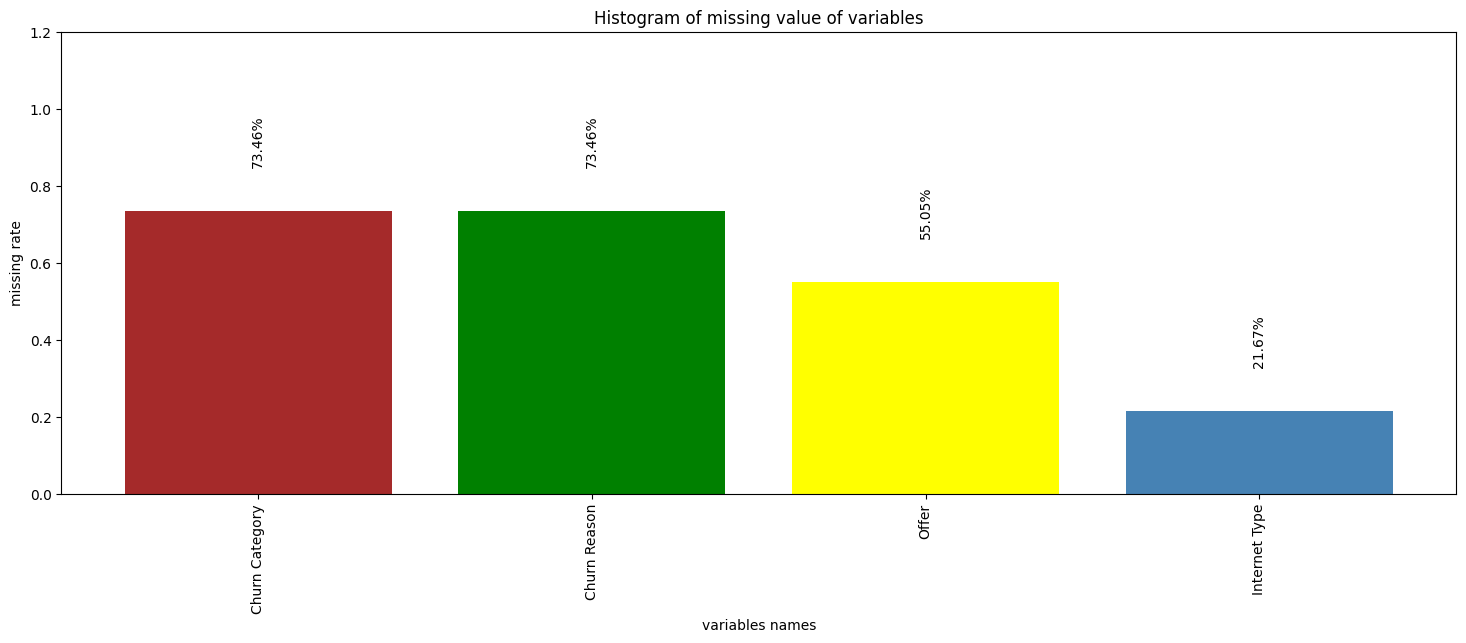

In [33]:
missing=telcom.isnull().sum().reset_index().rename(columns={0:'missNum'})
missing['missRate']=missing['missNum']/telcom.shape[0]
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',color=['brown','green','yellow','steelblue','red'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])

plt.show()

### Evaluation of Missing Values

Upon analyzing the dataset, we identified the presence of missing values in several columns. The following columns have missing values:

- **Offer**: 3877 missing values
- **Internet Type**: 1526 missing values
- **Churn Category**: 5174 missing values
- **Churn Reason**: 5174 missing values

The rest of the columns do not contain any missing values. The columns with missing values are critical for understanding customer behavior and churn reasons. Therefore, it is essential to address these missing values appropriately to ensure the integrity of our analysis and modeling.

We will consider various strategies to handle these missing values, such as imputation with the most frequent value, filling with a placeholder like 'NA', or using advanced techniques like predictive modeling to estimate the missing values. The chosen strategy will depend on the nature of the data and the impact of these missing values on our analysis.

In [34]:
# Overview of the 'Offer' column
print("Offer column overview:")
print(telcom['Offer'].value_counts(dropna=False))

# Overview of the 'Internet Type' column
print("\nInternet Type column overview:")
print(telcom['Internet Type'].value_counts(dropna=False))

Offer column overview:
Offer
NaN        3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64

Internet Type column overview:
Internet Type
Fiber Optic    3035
DSL            1652
NaN            1526
Cable           830
Name: count, dtype: int64


Documentation Comment:

1. Offer Column:
    - The 'Offer' column has a significant number of NaN values (3877), which suggests that a large portion of the data does not have an associated offer.
    - We will go with the understanding that those people just did not get an offer and therefore we will set the offer to "No Offer".
    - The distribution of the remaining offers shows that 'Offer B' and 'Offer E' are the most common among those who received an offer.

2. Internet Type Column:
    - The 'Internet Type' column also has a notable number of NaN values (1526), indicating missing data for the type of internet service for these entries.
    - 'Fiber Optic' is the most common internet type, followed by 'DSL' and 'Cable'.
    - Those that have NaN probably do not have an internet contract and therefore we will set this NaN to "No Internet Type".
    
Overall, the NaN values in both columns suggest missing data that could impact the completeness and accuracy of any analysis performed on this dataset. It is important to address these NaN values appropriately, eby adapting their values to the described "No Offer" and "no contract type" respectively.

In [35]:
telcom['Offer'] = telcom['Offer'].fillna('No Offer')
telcom['Internet Type'] = telcom['Internet Type'].fillna('No Internet Type')

In [36]:
# Overview of the 'Churn Category' column
print("\nChurn Category column overview:")
print(telcom['Churn Category'].value_counts(dropna=False))

# Overview of the 'Churn Reason' column
print("\nChurn Reason column overview:")
print(telcom['Churn Reason'].value_counts(dropna=False))


Churn Category column overview:
Churn Category
NaN                5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

Churn Reason column overview:
Churn Reason
NaN                                          5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                    

### Analysis of Missing Values in 'Churn Category' and 'Churn Reason' Columns

The 'Churn Category' column has a significant number of missing values (5174). 
The 'Churn Reason' column also has a substantial number of missing values (5174).
The missing values in both the 'Churn Category' and 'Churn Reason' columns are identical in number, suggesting a potential interaction between these columns. It is possible that when the 'Churn Category' is missing, the 'Churn Reason' is also missing, indicating that the data for these customers might not have been recorded or was lost.

The reasons for the missing values could be varied, including data entry errors, lack of information provided by customers, or issues during data collection. Given the importance of these columns in understanding customer churn, it is crucial to address these missing values appropriately.

We can consider several strategies to handle these missing values:
1. Imputation with a placeholder like 'Unknown' or 'Not Provided'.
2. Analyzing patterns in other columns to predict the missing values.
3. Excluding these rows from certain analyses if they do not significantly impact the results.

We will explore these strategies further. Specifically, we want to determine if these NaN values are present only for rows where the 'Churn' column is 'No'. This would imply that the missing values in 'Churn Category' and 'Churn Reason' are due to the fact that the customer did not churn, and hence, there was no need to fill out these columns.

Steps:
1. Count the number of rows where the 'Churn' column is 'No'.
2. Verify if this count matches the number of missing values in the 'Churn Category' and 'Churn Reason' columns.
3. Check if all rows with 'No' in the 'Churn' column also have NaN values in the 'Churn Category' and 'Churn Reason' columns.


In [37]:
# Step 1: Count the number of rows where the 'Churn' column is 'No'
no_churn_count = telcom[telcom['Churn'] == 'No'].shape[0]
print(f"Number of rows where 'Churn' is 'No': {no_churn_count}")

# Step 2: Verify if this count matches the number of missing values in the 'Churn Category' and 'Churn Reason' columns
missing_churn_category_count = telcom['Churn Category'].isnull().sum()
missing_churn_reason_count = telcom['Churn Reason'].isnull().sum()
print(f"Number of missing values in 'Churn Category': {missing_churn_category_count}")
print(f"Number of missing values in 'Churn Reason': {missing_churn_reason_count}")

# Step 3: Check if all rows with 'No' in the 'Churn' column also have NaN values in the 'Churn Category' and 'Churn Reason' columns
no_churn_missing_churn_category = telcom[telcom['Churn'] == 'No']['Churn Category'].isnull().all()
no_churn_missing_churn_reason = telcom[telcom['Churn'] == 'No']['Churn Reason'].isnull().all()
print(f"All rows with 'No' in 'Churn' have NaN in 'Churn Category': {no_churn_missing_churn_category}")
print(f"All rows with 'No' in 'Churn' have NaN in 'Churn Reason': {no_churn_missing_churn_reason}")

Number of rows where 'Churn' is 'No': 5174
Number of missing values in 'Churn Category': 5174
Number of missing values in 'Churn Reason': 5174
All rows with 'No' in 'Churn' have NaN in 'Churn Category': True
All rows with 'No' in 'Churn' have NaN in 'Churn Reason': True


Therefore our hypothesis is proven and we will set the NaN values in the `Churn Category` and the `Churn Reason` to "No Churn".

In [38]:
telcom['Churn Category'] = telcom['Churn Category'].fillna('No Churn')
telcom['Churn Reason'] = telcom['Churn Reason'].fillna('No Churn')

Now there should be no NaN in the columns anymore.

In [39]:
# Display the first few entries for each column with missing values
print("\nFirst few entries for 'Offer' column with missing values:")
print(telcom[telcom['Offer'].isnull()]['Offer'].head())

print("\nFirst few entries for 'Internet Type' column with missing values:")
print(telcom[telcom['Internet Type'].isnull()]['Internet Type'].head())

print("\nFirst few entries for 'Churn Category' column with missing values:")
print(telcom[telcom['Churn Category'].isnull()]['Churn Category'].head())

print("\nFirst few entries for 'Churn Reason' column with missing values:")
print(telcom[telcom['Churn Reason'].isnull()]['Churn Reason'].head())


First few entries for 'Offer' column with missing values:
Series([], Name: Offer, dtype: object)

First few entries for 'Internet Type' column with missing values:
Series([], Name: Internet Type, dtype: object)

First few entries for 'Churn Category' column with missing values:
Series([], Name: Churn Category, dtype: object)

First few entries for 'Churn Reason' column with missing values:
Series([], Name: Churn Reason, dtype: object)
